In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D
from keras.src.callbacks import ReduceLROnPlateau
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.optimizers import RMSprop
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import confusion_matrix

In [107]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [108]:
Y_train=train['label']
X_train=train.drop(columns='label',axis=1)

In [109]:
del train


In [110]:
#sns.countplot(Y_train)
#plt.show()

In [111]:
Y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [112]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [113]:
#Normalization
X_train=X_train/255.0
test=test/255.0

In [114]:
#Reshape
print(X_train.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0   

In [115]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [116]:
print(Y_train.value_counts())

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [117]:
#Label Encoding
Y_train=to_categorical(Y_train,num_classes=10)

In [118]:
print(Y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [119]:
random_seed=2
np.random.seed(random_seed)

In [120]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=random_seed)

In [121]:
print(X_train.shape,Y_train.shape)

(37800, 28, 28, 1) (37800, 10)


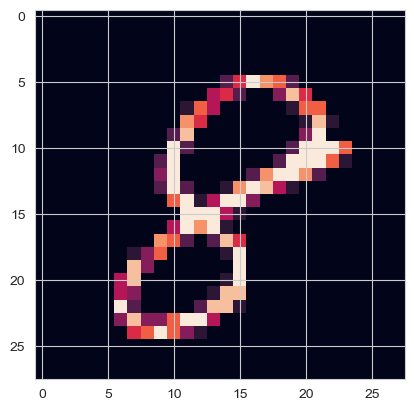

In [122]:
plt.imshow(X_train[0][:,:,0])
plt.show()

In [123]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model







In [124]:
model=create_model()

D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [126]:
epochs=30
batch_size=86

In [127]:
datagen=ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,samplewise_std_normalization=False,zca_whitening=False,
rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False,vertical_flip=False)
datagen.fit(X_train)


In [128]:
history=model.fit(datagen.flow(X_train,Y_train,batch_size=batch_size),epochs=epochs,validation_data=(X_val,Y_val),verbose=2,steps_per_epoch=X_train.shape[0]//batch_size,callbacks=[learning_rate_reduction])

Epoch 1/30


D:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 - 18s - 40ms/step - accuracy: 0.8177 - loss: 0.5649 - val_accuracy: 0.9700 - val_loss: 0.1024 - learning_rate: 0.0010
Epoch 2/30


D:\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


439/439 - 1s - 2ms/step - accuracy: 0.9302 - loss: 0.2192 - val_accuracy: 0.9783 - val_loss: 0.0754 - learning_rate: 0.0010
Epoch 3/30
439/439 - 17s - 38ms/step - accuracy: 0.9482 - loss: 0.1723 - val_accuracy: 0.9836 - val_loss: 0.0589 - learning_rate: 0.0010
Epoch 4/30
439/439 - 1s - 2ms/step - accuracy: 0.9767 - loss: 0.1109 - val_accuracy: 0.9826 - val_loss: 0.0624 - learning_rate: 0.0010
Epoch 5/30
439/439 - 21s - 48ms/step - accuracy: 0.9649 - loss: 0.1172 - val_accuracy: 0.9890 - val_loss: 0.0359 - learning_rate: 0.0010
Epoch 6/30
439/439 - 1s - 3ms/step - accuracy: 0.9884 - loss: 0.0680 - val_accuracy: 0.9876 - val_loss: 0.0418 - learning_rate: 0.0010
Epoch 7/30
439/439 - 18s - 42ms/step - accuracy: 0.9721 - loss: 0.0952 - val_accuracy: 0.9898 - val_loss: 0.0392 - learning_rate: 0.0010
Epoch 8/30
439/439 - 1s - 3ms/step - accuracy: 0.9767 - loss: 0.1605 - val_accuracy: 0.9910 - val_loss: 0.0347 - learning_rate: 0.0010
Epoch 9/30
439/439 - 19s - 44ms/step - accuracy: 0.9756 - lo

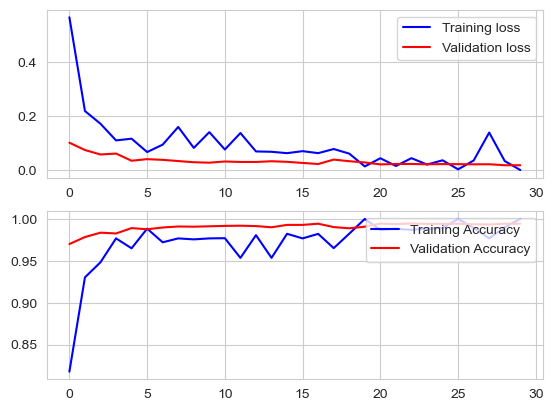

In [133]:
fig,ax=plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='blue',label='Training loss')
ax[0].plot(history.history['val_loss'],color='red',label='Validation loss')
legend = ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'],color='blue',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='red',label='Validation Accuracy')
legend = ax[1].legend(loc='upper right')
plt.show()

In [137]:
def plot_confusion_matrix(cm,classes,normalize=False,title=False,cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


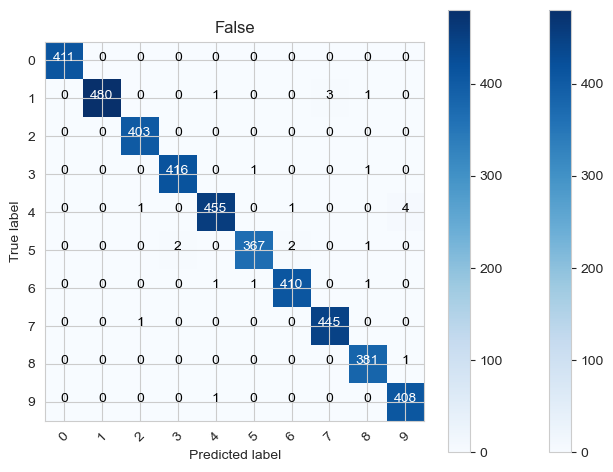

In [139]:
Y_Pred=model.predict(X_val)
Y_pred_classes=np.argmax(Y_Pred,axis=1)
Y_true=np.argmax(Y_val,axis=1)
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
plot_confusion_matrix(confusion_mtx,classes=range(10))

In [140]:
results=model.predict(test)
results=np.argmax(results,axis=1)
results=pd.Series(results,name="Label")



875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [141]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [142]:
submission.to_csv("submission.csv",index=False)